# Titanic: Machine Learning from Disaster


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This is a [Kaggle competition](https://www.kaggle.com/c/titanic) where we have to predict whether a person, given thier available details, will survive the diaster.

In [72]:
# Importing Libraries for EDA and data handling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [73]:
# Importing Libraries for ML and Statistics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier

In [74]:
df_train = pd.read_csv("data/titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df_test = pd.read_csv("data/titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Columns

- survival:	Survival	0 = No, 1 = Yes
- pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp:	# of siblings / spouses aboard the Titanic	
- parch:	# of parents / children aboard the Titanic	
- ticket:	Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Observations:

- Average age of passengers on boards was 30 Years
- We have 177 null values in Age col.
- 38% passengers in this dataset survived the disaster (making this dataset *slightly* unbalanced)
- Average Fare was £ 32
- Most passengers were travelling in 2nd Class

In [77]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [78]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [80]:
combine = [df_train, df_test]

In [81]:
# Extracting and making a new column for titles using Reg-Ex
# This will be useful in filling the missing values in the Age column

for row in combine:
    row["Title"] = row["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [83]:
# Count of each title
# We observe that there are four main or dominant titles: Mr, Mrs, Master & Miss

df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Lady          1
Ms            1
Jonkheer      1
Countess      1
Capt          1
Sir           1
Mme           1
Name: Title, dtype: int64

In [84]:
df_test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [85]:
mask_title_mr = (df_train["Title"] == "Mr")
mr = df_train[mask_title_mr]["Age"].values

mask_title_mrs = (df_train["Title"] == "Mrs")
mrs = df_train[mask_title_mrs]["Age"].values

mask_title_master = (df_train["Title"] == "Master")
master = df_train[mask_title_master]["Age"].values

mask_title_miss = (df_train["Title"] == "Miss")
miss = df_train[mask_title_miss]["Age"].values

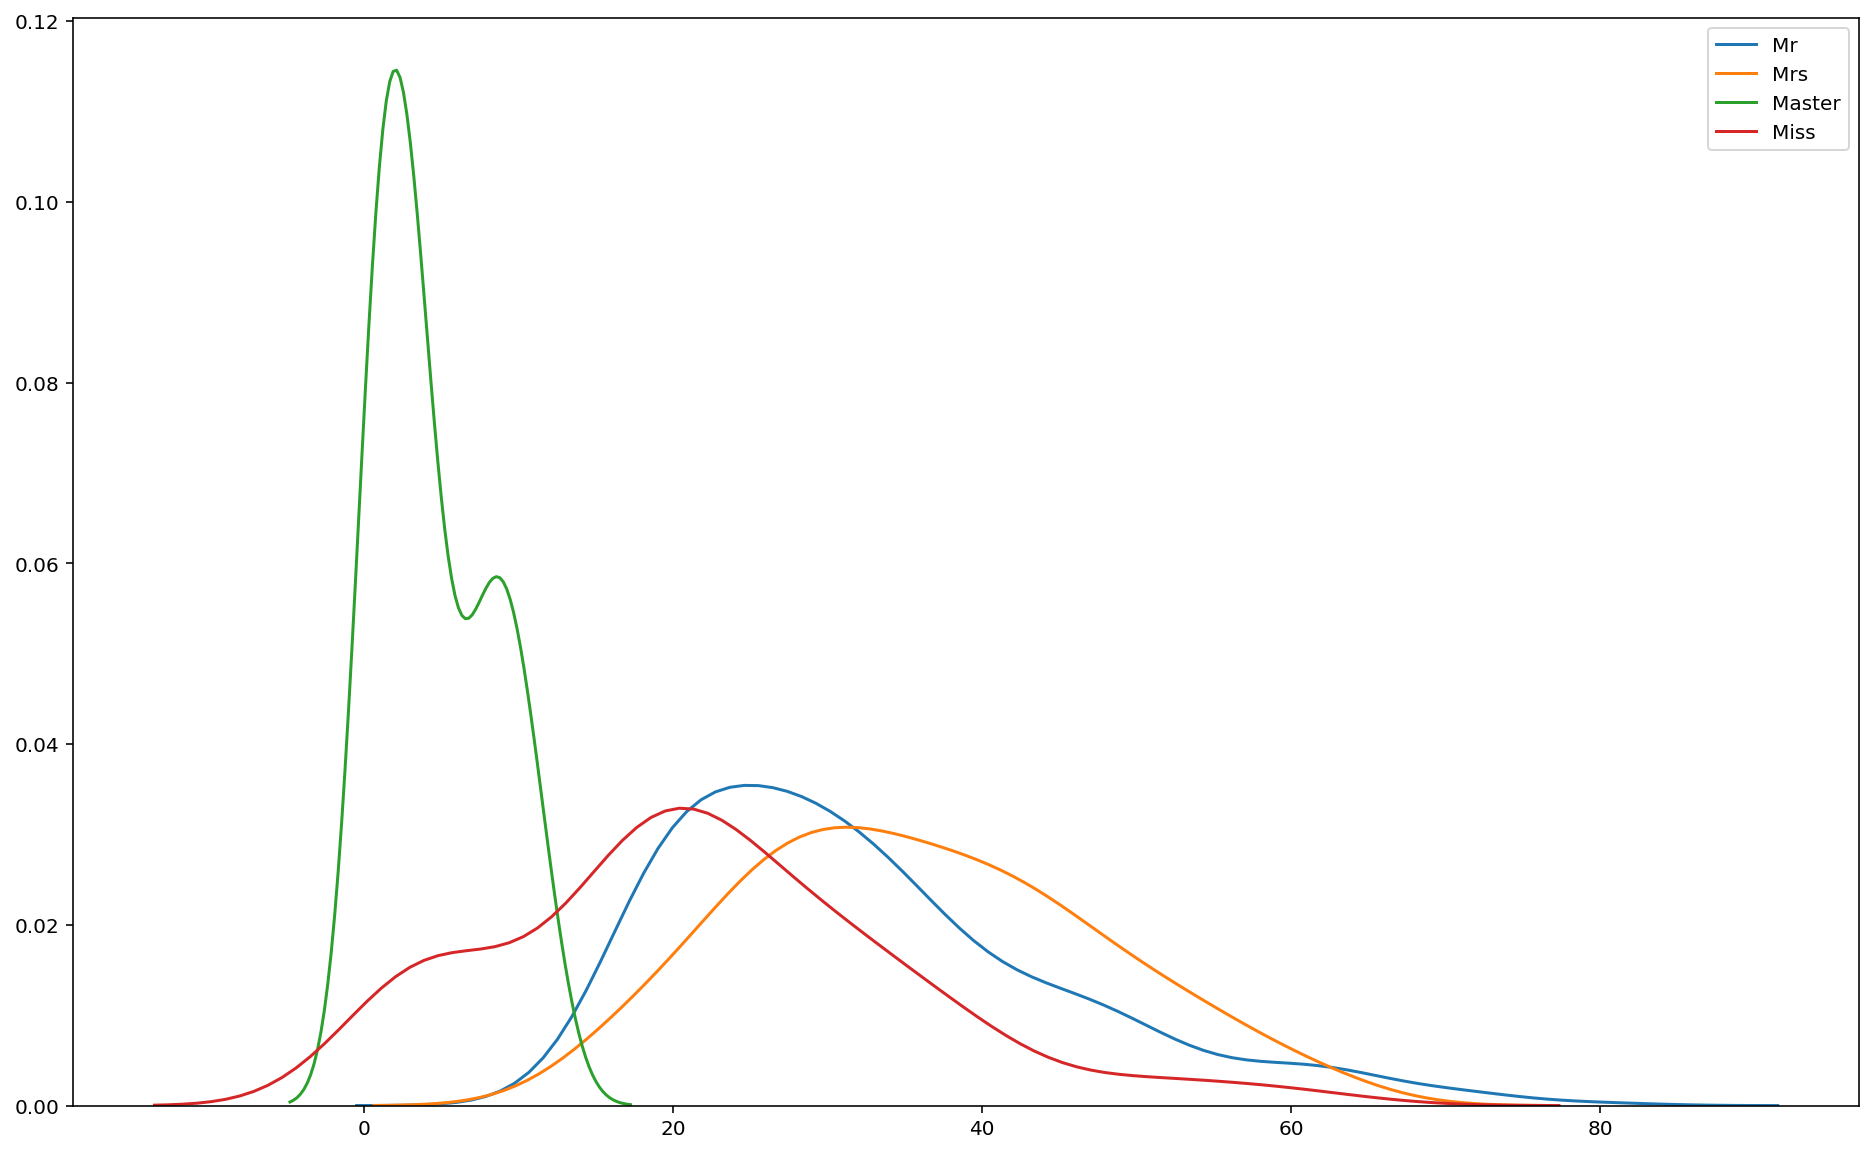

In [86]:
# This plot will help us to assign Age_categories to the rows having missing age based on title

plt.figure(figsize=(16, 10))
sns.distplot(mr, label="Mr", hist=False)
sns.distplot(mrs, label="Mrs",hist=False)
sns.distplot(master, label="Master", hist=False)
sns.distplot(miss, label="Miss", hist=False)

In [87]:
main_titles = ["Mr", "Mrs", "Master", "Miss"]
for i in range(len(df_train)):
    if(df_train.iloc[i, -1] not in main_titles):
        df_train.iloc[i, -1] = "Mr"

for i in range(len(df_test)):
    if(df_test.iloc[i, -1] not in main_titles):
        df_test.iloc[i, -1] = "Mr"

In [88]:
df_train["Title"].value_counts()

Mr        544
Miss      182
Mrs       125
Master     40
Name: Title, dtype: int64

In [89]:
df_test["Title"].value_counts()

Mr        247
Miss       78
Mrs        72
Master     21
Name: Title, dtype: int64

In [90]:
age_bins = [-np.inf, 18, 35, 60, np.inf]
df_train["Age_Category"] = pd.cut(df_train["Age"], bins=age_bins, labels=[0, 1, 2, 3])
df_test["Age_Category"] = pd.cut(df_test["Age"], bins=age_bins, labels=[0, 1, 2, 3])

In [91]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           714 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  Title         891 non-null    object  
 13  Age_Category  714 non-null    category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.7+ KB


In [93]:
df_train["Age"].fillna(-1, inplace=True)

In [94]:
for i in range(len(df_train)):
    if(df_train.iloc[i, 5]==-1):
        if(df_train.iloc[i, 12] == "Mr"):
            df_train.iloc[i, 13] = 1
        elif(df_train.iloc[i, 12] == "Mrs"):
            df_train.iloc[i, 13] = 2
        elif(df_train.iloc[i, 12] == "Master"):
            df_train.iloc[i, 13] = 0
        elif(df_train.iloc[i, 12] == "Miss"):
            df_train.iloc[i, 13] = 0

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  Title         891 non-null    object  
 13  Age_Category  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.7+ KB


In [96]:
df_test["Age"].fillna(-1, inplace=True)

In [97]:
for i in range(len(df_test)):
    if(df_test.iloc[i, 4]== -1):
        if(df_test.iloc[i, 11] == "Mr"):
            df_test.iloc[i, 12] = 1
        elif(df_test.iloc[i, 11] == "Mrs"):
            df_test.iloc[i, 12] = 2
        elif(df_test.iloc[i, 11] == "Master"):
            df_test.iloc[i, 12] = 0
        elif(df_test.iloc[i, 11] == "Miss"):
            df_test.iloc[i, 12] = 0

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Name          418 non-null    object  
 3   Sex           418 non-null    object  
 4   Age           418 non-null    float64 
 5   SibSp         418 non-null    int64   
 6   Parch         418 non-null    int64   
 7   Ticket        418 non-null    object  
 8   Fare          417 non-null    float64 
 9   Cabin         91 non-null     object  
 10  Embarked      418 non-null    object  
 11  Title         418 non-null    object  
 12  Age_Category  418 non-null    category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 39.9+ KB


In [99]:
# Calculating the number of members in family

for row in combine:
    row["Family"] = row["Parch"]+row["SibSp"]

In [100]:
df_train.drop(["Age", "Name", "Pclass", "Ticket"], axis="columns", inplace=True)

In [101]:
df_test.drop(["Age", "Name", "Pclass", "Ticket"], axis="columns", inplace=True)

In [102]:
df_train["Sex"] = df_train["Sex"].map({"male":1, "female":0})

In [103]:
df_test["Sex"] = df_test["Sex"].map({"male":1, "female":0})

In [104]:
df_train["Embarked"].fillna("S", inplace=True)

In [105]:
for row in combine:
    row["Embarked"] = row["Embarked"].map({"S":0, "Q":1, "C":2})
    row["Title"] = row["Title"].map({"Mr":0, "Mrs":1, "Master":2, "Miss":3})

In [106]:
df_train.head()

,PassengerId,Survived,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Category,Family
0,1,0,1,1,0,7.2500,NaN,0,0,1,1
1,2,1,0,1,0,71.2833,C85,2,1,2,1
2,3,1,0,0,0,7.9250,NaN,0,3,1,0
3,4,1,0,1,0,53.1000,C123,0,1,1,1
4,5,0,1,0,0,8.0500,NaN,0,0,1,0


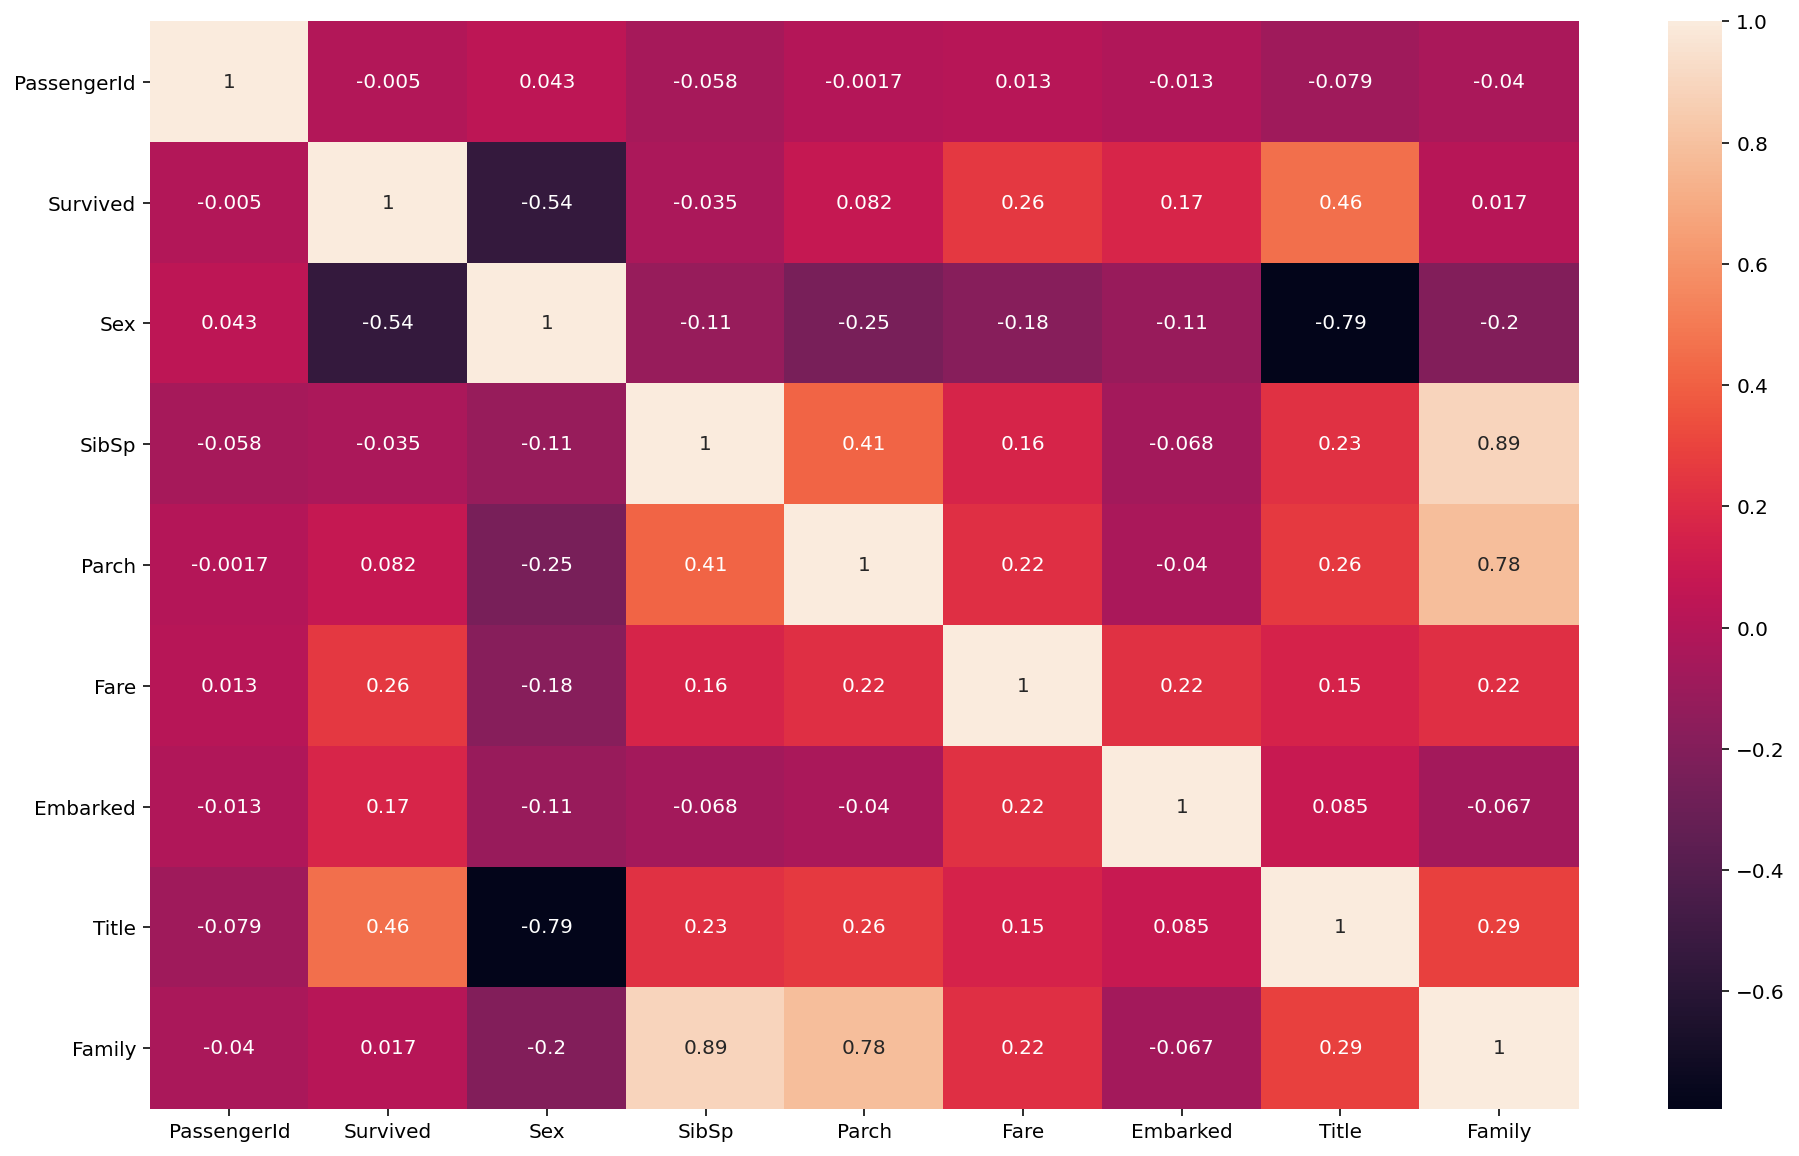

In [107]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True)

In [108]:
df_train.drop(["Cabin"], axis=1,inplace=True)

In [109]:
df_test.drop(["Cabin"], axis=1,inplace=True)

In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Sex           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    int64   
 7   Title         891 non-null    int64   
 8   Age_Category  891 non-null    category
 9   Family        891 non-null    int64   
dtypes: category(1), float64(1), int64(8)
memory usage: 63.8 KB


In [111]:
df_test["Fare"].fillna(df_test["Fare"].mean(), inplace=True)

In [112]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Sex           418 non-null    int64   
 2   SibSp         418 non-null    int64   
 3   Parch         418 non-null    int64   
 4   Fare          418 non-null    float64 
 5   Embarked      418 non-null    int64   
 6   Title         418 non-null    int64   
 7   Age_Category  418 non-null    category
 8   Family        418 non-null    int64   
dtypes: category(1), float64(1), int64(7)
memory usage: 26.8 KB


In [113]:
x_train = df_train.drop(["Survived", "PassengerId"], axis=1).values
y_train = df_train["Survived"].values

In [114]:
y_train_rshp = y_train.reshape(y_train.shape[0], 1)
y_train_rshp.shape

(891, 1)

In [115]:
x_test = df_test.drop(["PassengerId"], axis=1).values

In [116]:
print(x_train.shape); print(y_train.shape)

(891, 8)
(891,)


In [117]:
print(x_test.shape)

(418, 8)


In [118]:
std_sclr = StandardScaler()
std_sclr.fit(x_train)
x_train_std = std_sclr.transform(x_train)
x_test_std = std_sclr.transform(x_test)

In [119]:
pca = PCA(n_components=4)
pca.fit(x_train)
x_train_std = pca.transform(x_train_std)
x_test_std = pca.transform(x_test_std)

In [120]:
pca_plot = np.concatenate((x_train_std, y_train_rshp), axis=1)

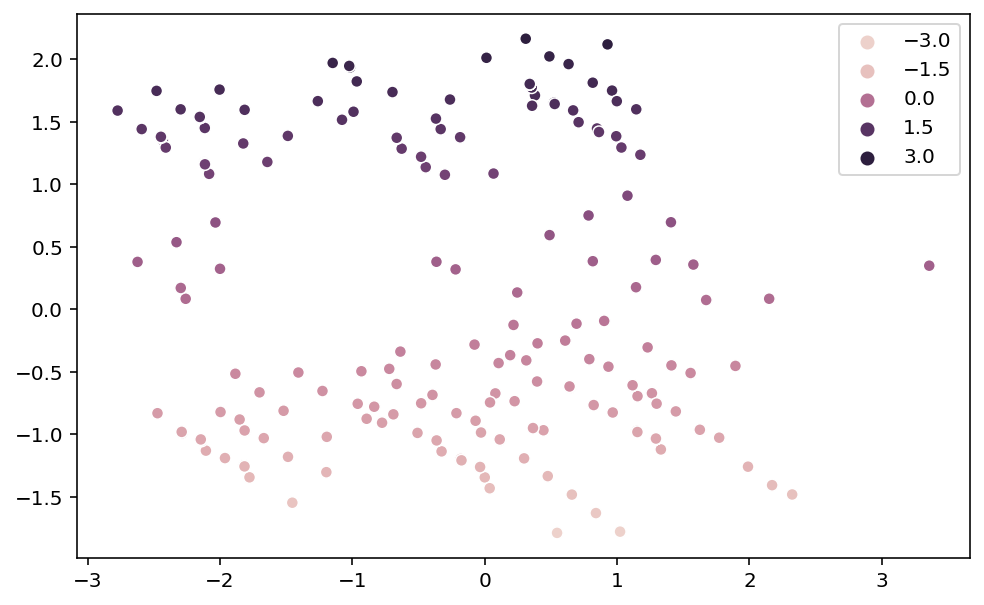

In [121]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_plot[:, 2], y=pca_plot[:, 3], hue=pca_plot[:, 3])

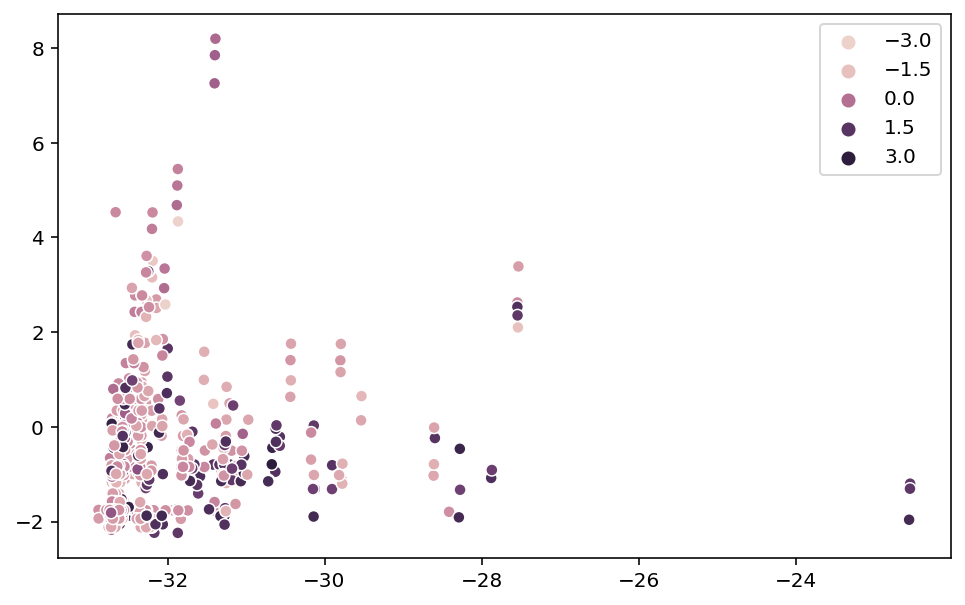

In [122]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_plot[:, 0], y=pca_plot[:, 1], hue=pca_plot[:, 3])

In [123]:
x_tr = x_train_std[100:, :]
x_val = x_train_std[:100, :]
y_tr = y_train[100:]
y_val = y_train[:100]

In [124]:
svc_param = [{"kernel":["poly"],
              "gamma":[0.009, 0.005],
              "degree":[4],
              "C":[1, 1.1, 1.2]}]

svc = SVC()
grid_search_svc = GridSearchCV(svc, svc_param, cv=5)

grid_search_svc.fit(x_tr, y_tr)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 1.1, 1.2], 'degree': [4],
                          'gamma': [0.009, 0.005], 'kernel': ['poly']}])

In [125]:
grid_search_svc.best_params_

{'C': 1, 'degree': 4, 'gamma': 0.009, 'kernel': 'poly'}

In [126]:
grid_search_svc.score(x_val, y_val)

0.83

In [127]:
dt = DecisionTreeClassifier()
param_dt = [{"max_depth":[2, 3, 5],
            "min_samples_split":[2, 3]}]
grid_search_dt = GridSearchCV(dt, param_dt, cv=5)

grid_search_dt.fit(x_tr, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 5], 'min_samples_split': [2, 3]}])

In [128]:
grid_search_dt.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [129]:
grid_search_dt.score(x_val, y_val)

0.83

In [130]:
param_rf = [{"n_estimators":[500, 550, 600, 700],
            "max_samples":[100, 150, 200],
             "max_features":[0.1, 0.3, 0.5, 0.7, 0.9],
            "bootstrap":[True],
            "n_jobs":[-1]}]

rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_rf, cv=5)
grid_search_rf.fit(x_tr, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True],
                          'max_features': [0.1, 0.3, 0.5, 0.7, 0.9],
                          'max_samples': [100, 150, 200],
                          'n_estimators': [500, 550, 600, 700],
                          'n_jobs': [-1]}])

In [131]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_features': 0.1,
 'max_samples': 150,
 'n_estimators': 550,
 'n_jobs': -1}

In [132]:
grid_search_rf.score(x_val, y_val)

0.8

In [133]:
svc = SVC(kernel="poly", degree=4, gamma=0.009, C=1)
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
rf = RandomForestClassifier(max_features=0.3, max_samples=100, n_estimators=600, bootstrap=True, n_jobs=-1)

voting_clf = VotingClassifier(estimators=[("svc", svc), ("dt", dt), ("rf", rf)], voting="hard")
voting_clf.fit(x_tr, y_tr)

VotingClassifier(estimators=[('svc',
                              SVC(C=1, degree=4, gamma=0.009, kernel='poly')),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('rf',
                              RandomForestClassifier(max_features=0.3,
                                                     max_samples=100,
                                                     n_estimators=600,
                                                     n_jobs=-1))])

In [134]:
voting_clf.score(x_val, y_val)

0.83

In [135]:
ans  = voting_clf.predict(x_test_std)

In [136]:
ans

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [137]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": ans
    })
submission.to_csv("answer.csv", index=False)